In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import os
os.chdir('C:/Users/raja/Documents/retaildataset')

In [2]:
data = pd.read_csv('mock_kaggle.csv')

In [3]:
data

,data,venda,estoque,preco
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29
...,...,...,...,...
932,2016-07-27,98,3179,2.39
933,2016-07-28,108,3071,2.39
934,2016-07-29,128,4095,2.39
935,2016-07-30,270,3825,2.39


In [4]:
data.head()

,data,venda,estoque,preco
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29


In [5]:
data.tail()

,data,venda,estoque,preco
932,2016-07-27,98,3179,2.39
933,2016-07-28,108,3071,2.39
934,2016-07-29,128,4095,2.39
935,2016-07-30,270,3825,2.39
936,2016-07-31,183,3642,2.39


In [6]:
data.shape

(937, 4)

In [7]:
data.describe()

,venda,estoque,preco
count,937.000000,937.000000,937.000000
mean,90.533618,1608.258271,1.592572
std,80.682089,1356.691877,0.529502
min,0.000000,0.000000,0.000000
25%,33.000000,794.000000,1.290000
50%,76.000000,1348.000000,1.390000
75%,127.000000,1964.000000,1.890000
max,542.000000,7228.000000,2.980000


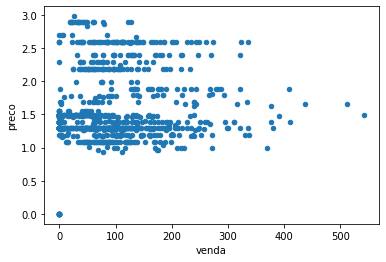

In [8]:
data.plot(kind='scatter', x='venda',y='preco')
plt.show()

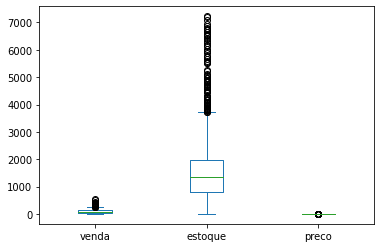

In [9]:
data.plot(kind='box')
plt.show()

In [10]:
data.corr()

,venda,estoque,preco
venda,1.000000,0.153659,0.094779
estoque,0.153659,1.000000,-0.032604
preco,0.094779,-0.032604,1.000000


In [11]:
venda=pd.DataFrame(data['venda'])
preco=pd.DataFrame(data['preco'])

In [12]:
lm= linear_model.LinearRegression()
model =lm.fit(venda,preco)

In [13]:
model.coef_

array([[0.00062202]])

In [14]:
model.intercept_

array([1.53625839])

In [15]:
model.score(venda, preco)

0.008983124365282591

In [16]:
import numpy as np
venda_new = np.array([97])
venda_new =venda_new.reshape(-1,1)
preco_predict = model.predict(venda_new)
preco_predict

C:\Users\raja\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1.59659425]])

In [17]:
X=np.array([100,78,94])
X=pd.DataFrame(X)
Y=model.predict(X)
Y=pd.DataFrame(Y)
df=pd.concat([X,Y], axis=1,keys=['venda_new','preco_predict'])
df

C:\Users\raja\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,venda_new,preco_predict
,0,0
0,100,1.598460
1,78,1.584776
2,94,1.594728


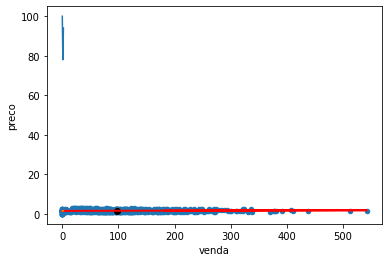

In [18]:
data.plot(kind='scatter', x='venda', y='preco')
plt.plot(venda,model.predict(venda),color='red', linewidth=2)
plt.scatter(venda_new,preco_predict, color='black')
plt.plot(df)
plt.show()